<a href="https://colab.research.google.com/github/MinCiencia/Datos-COVID19/blob/master/MinCiencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="MinCiencia logo" height="100px" src="https://avatars3.githubusercontent.com/u/63315154?s=400&u=e6494f16c4241b61f4b0696436111bde231ff149&v=4" align="left" hspace="10px" vspace="0px"></p>

<h1>Bienvenido al jupyter notebook demo del MinCiencia</h1>



## **Para empezar**

Este documento te permite interactuar con los datos que se encuentran en el [repositorio](https://github.com/MinCiencia/Datos-COVID19) del [Ministerio de Ciencia, Tecnología, Conocimiento e Innovación](http://www.minciencia.gob.cl/COVID19). Estos datos son recopilados de las cifras oficiales publicadas por el [Ministerio de Salud](https://www.gob.cl/coronavirus/cifrasoficiales/#informes) sobre la pandemia del COVID-19 en Chile.

Este notebook es un ejemplo y puedes usarlo como base para generar tus propios gráficos y/o productos. Los datos publicados están en https://colab.research.google.com/github/MinCiencia/output/blob/master


# <h2>Para trabajar con los productos</h2>

Este notebook está escrito utilizando el lenguaje de programación [Python](https://www.python.org/about/) versión [3.x](https://www.python.org/download/releases/3.0/), cuya lectura se facilita a programadores no expertos. Cada bloque de ejecución está separado en distintas celdas, es necesario "ejecutar" cada una en secuencia haciendo click en botón "play" que aparece al posicionar el mouse sobre el recuadro [ ] al inicio de cada celda. Una vez que la celda se ejecuta, aparece un número que indica el órden en que se ha ejecutado.




Una manera comun de manipular los datos, es usando [pandas](https://pandas.pydata.org/). Para cargar uno de los archivos en un dataframe. También es necesario utilizar [numpy](https://numpy.org/) para los distintos cálculos

In [0]:
import numpy as np
import pandas as pd

Los datos están almacenados como tablas en formato csv. Algunas tablas están almacenadas por día. Es importante mantener el formato 'año-mes-día' (las comillas simples o dobles indican que es texto y no se ejecutará como una operación matemática)


In [0]:
# el símbolo # al inicio de la línea nos indica que esto es un comentario, no se ejecuta con el código
# date indica la fecha de los datos que queremos utilizar

date = '2020-04-20'

Para leer la tabla correspondiente al día escogido y se le asigna el nombre dataTotalRegion:

In [0]:
dataTotalRegion = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/"+date+"-CasosConfirmados-totalRegional.csv", index_col='Region')

Utilizamos read_csv de pandas con el parámetro

```
# index_col = 'Region'
```

para indicar que el índice de la tabla son los nombres de las regiones. Los nombres de las columnas se listan a continuación

In [0]:
columnas = list(dataTotalRegion.columns.values)
columnas

['Casos  nuevos', 'Casos  totales', '%  Casos  totales**', 'Fallecidos']

Podemos ver los valores de las columnas ejecutando en una celda

```
# dataTotalRegion
```

En algunos casos la tabla puede ser muy extensa y eso puede resultar poco práctico. Para limitar ese despliegue se pueden escoger algunas columnas, como por ejemplo

In [0]:
dataTotalRegion[columnas[0:2]].head(5)

,Casos nuevos,Casos totales
Region,,
Arica y Parinacota,16,161
Tarapaca,3,93
Antofagasta,14,263
Atacama,0,13
Coquimbo,1,69


entre los [ ] se indican las columnas deseadas, de la primera a la tercera en el ejemplo (**ojo, Python considera que el primer índice es el 0**). Además, se agrega el atributo 

```
# .head(5)
```
para listar las 5 primeras filas de la tabla. También podemos utilizar el atributo 

```
# .tail(4)
```

para listar las últimas 4 filas.


In [0]:
dataTotalRegion[columnas[0:2]].tail(4)

,Casos nuevos,Casos totales
Region,,
Los Lagos,3,424
Aysen,0,7
Magallanes,13,566
Total,419,10507


o .iloc[ ] para filas intermedias


In [0]:
dataTotalRegion[columnas[0:2]].iloc[3:8]

,Casos nuevos,Casos totales
Region,,
Atacama,0,13
Coquimbo,1,69
Valparaiso,7,388
Metropolitana,262,5643
O'Higgins,1,56


Para fines prácticos, separaremos los dataFrames en 'nuevosConfirmados' para los datos al día, 'totalConfirmados' para los datos acumulados y 'Fallecidos' para los decesos acumulados.

In [0]:
data = pd.DataFrame()

In [0]:
data['nuevosConfirmados'] = dataTotalRegion[columnas[0]]
data['totalConfirmados'] = dataTotalRegion[columnas[1]]
data['Fallecidos'] = dataTotalRegion[columnas[2]]

Para hacer gráficos utilizamos [matplotlib](https://matplotlib.org/), con el estilo (opcional) 'fivethirtyeight'

In [0]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

En ax se "dibujan" los datos, es importante notar que el dataFrame a graficar data['nuevosConfirmados'] se utiliza .iloc[:-1] para evitar que se utilice la última fila de datos que corresponde al **Total** que no es una Region.

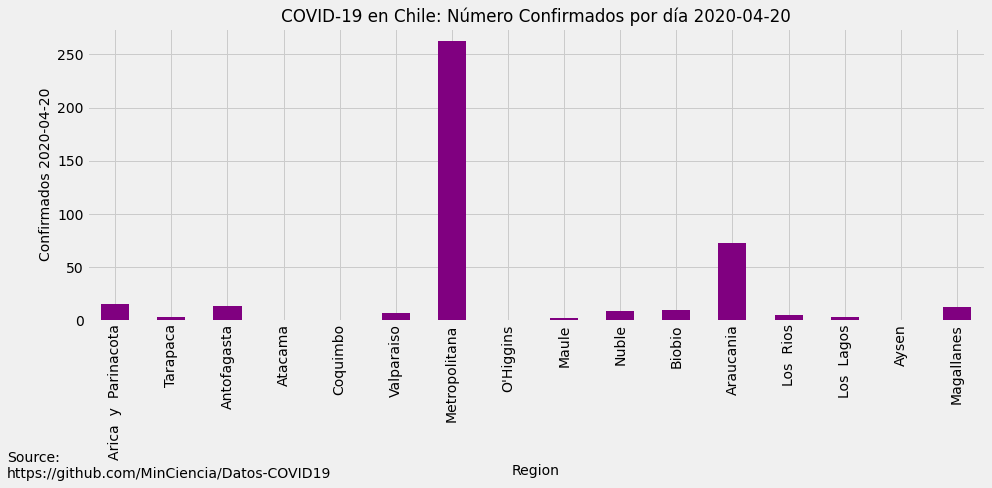

In [0]:
# Figura en la que definimos un tamaño con el parámetro figzise
# utilizamos una escala linear con la instrucción scale = 'linear'

fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'linear'

data['nuevosConfirmados'].iloc[:-1].plot(ax=ax, kind="bar", color='purple')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número Confirmados por día '+date, fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Confirmados '+date, fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(date+'-COVID-19-Chile-Confirmados-Region.png', bbox_inches='tight', format='png', dvi=700)

Si queremos agregar información a la visualización de los datos, añadimos etiquetas a los gráficos utilizando una función (la definimos una vez y se "llamará" cuando se necesite). La utilizaremos en la figura siguiente como ejemplo

In [0]:
#  Función que define etiquetas en los gráficos. Aquí **no es necesario modificarla**
#
#  qué significan los parámetros:
#  data: el dataFrame a utilizar e.g. data['nuevosConfirmados'].iloc[:-1]
#  scale: la que se defina en el entorno de la figura
#  fontsize: tamaño de la fuente de la etiqueta
#  ypos: posición de la etiqueta con respecto al valor graficado
#  color: el color de la etiqueta (estamos utilizando transparencia con alpha=0.5)

def my_tags(data,scale,fontsize,ypos,color):
  for i, val in enumerate(data):
    if val > 0:
      if scale == 'log': y_position = val*ypos 
      elif scale == 'linear': y_position = val + ypos
      ax.text(i-len(str(i))*0.1, y_position, str(int(val)), fontsize=fontsize,
            bbox=dict(boxstyle="square",
                    alpha=0.5,
                    fc=color,))

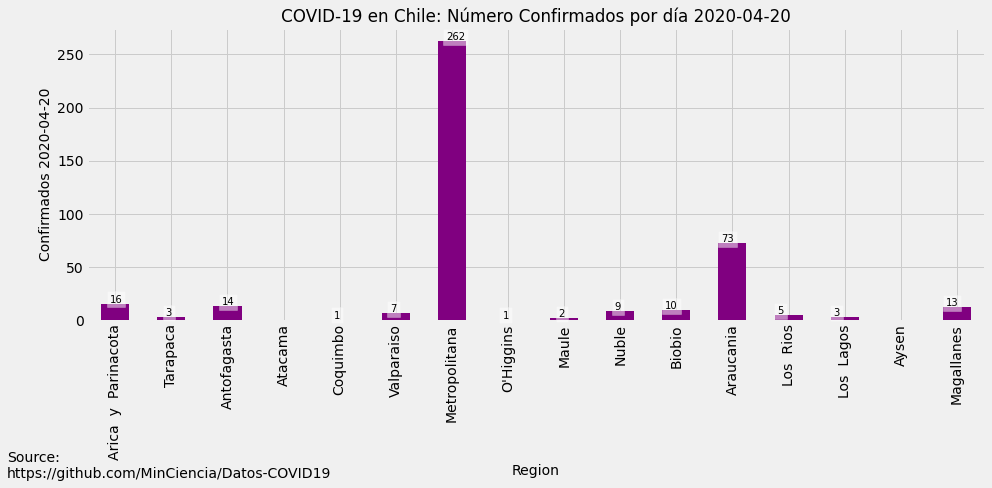

In [0]:
fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'linear'

data['nuevosConfirmados'].iloc[:-1].plot(ax=ax, kind="bar", color='purple')

# llamamos a la función my_tags, con fontsize = 10, 
# ypos = 1.1 (esta posición es relativa al valor de cada dato. ypos = 1 coloca la etiqueta sobre el valor del dato)
# escogimos el color blanco 'white'

fontsize = 10
ypos = 1.1
my_tags(data['nuevosConfirmados'].iloc[:-1],scale,fontsize,ypos,'white')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número Confirmados por día '+date, fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Confirmados '+date, fontsize='medium')

#  el gráfico se almacena en formato .png 

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')

# definimos un nombre de archivo considerando la fecha utilizada 'date' (que es texto)

filename = date+'-COVID-19-Chile-Confirmados-Region.png'
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

Importamos la biblioteca files de Google.colab para guardar el archivo correspondiente a la figura

In [0]:
from google.colab import files

files.download(filename)

Este gráfico se puede repetir para cada columna, es decir para data['totalConfirmados'] y data['Fallecidos'].

# <h3>Graficar datos de varios días</h3>

Para utilizar los datos de distintos días debemos establecer las fechas de nuestro interés. En los próximos ejemplos consideramos que la última fecha a graficar es hoy ('today') y la primera ('first_date') es cuando se reportó el primer contagio en el país. también consideramos la fecha del primer caso recuperado ('first_recovered')

In [0]:
today = date
first_date = '2020-03-03'
first_recovered = '2020-03-17'

# contamos los días considerados con la siguiente instrucción
total_days = (pd.to_datetime(date)-pd.to_datetime(first_date)).days
total_days

48

Se lee la tabla correspondiente a los recuperados en el país

In [0]:
dataTotalRecuperados = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/recuperados.csv", index_col=0)

Declaramos nuevos dataFrames para tener mayor claridad

In [0]:
# dataNew corresponde a los nuevos casos por día
# dataCum a los datos acumulados al día
# dataDeath al número de fallecidos acumulados al día
# dataRec es el número de recuperados acumulados al día

dataNew = pd.DataFrame()
dataCum = pd.DataFrame()
dataDeath = pd.DataFrame()
dataRec = pd.DataFrame()

Ahora se leen las tablas correspondientes a los días seleccionados, desde 'first_date' hasta 'today'. Algunas de las columnas tienen un nombre distinto día a día (desde la fuente), por eso debemos cubrir las distintas posibilidades. Por ejemplo, la columna correspondiente a los decesos puede tener nombre de 'Fallecidos', 'Casos fallecidos' o ' Casos fallecidos'

(** esta celda debe ejecutarse dos veces **, es un pequeño problema que estamos depurando).

In [0]:
for i in np.arange(total_days+1):
  date = (pd.to_datetime(first_date)+pd.DateOffset(i)).strftime('%Y-%m-%d')
  s = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/" + date + "-CasosConfirmados-totalRegional.csv"
  dataTotalRegion_by_date = pd.read_csv(s,index_col=0)
  if "Casos  nuevos" in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date[columnas[0]].values
  elif 'Casos nuevos' in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date["Casos nuevos"].values
  else:
    dataNew[date] = dataTotalRegion_by_date[" Casos nuevos"].values

  if "Casos  totales" in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date[columnas[1]].values
  elif 'Casos totales' in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date["Casos totales"].values
  else:
    dataCum[date] = dataTotalRegion_by_date[" Casos totales"].values
 
  if "Fallecidos" in dataTotalRegion_by_date.columns:
    dataDeath[date] = dataTotalRegion_by_date["Fallecidos"].values
  elif 'Casos fallecidos' in dataTotalRegion_by_date.columns:
    dataDeath[date] = dataTotalRegion_by_date["Casos fallecidos"].values
  elif ' Casos fallecidos' in dataTotalRegion_by_date.columns:
    dataDeath[date] = dataTotalRegion_by_date[" Casos fallecidos"].values
  else:
    dataDeath[date] = 0.

  if date < first_recovered: 
    dataRec[date] = 0 
  elif date >= first_recovered:
    dataRec[date] = dataTotalRecuperados[date].values
  dataRec.fillna(0)

In [0]:
# escribimos el dataFrame que nos da problemas para verificar que los datos se asignen de la manera esperada
# los valores desde el 'first_date' hasta el día anterior a 'first_recovered' deben ser 0 (cero)

dataRec

,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,5,6,8,11,17,22,33,43,61,75,156,201,234,335,427,528,617,728,898,1115,1274,1571,1864,2059,2367,2646,2937,3299,3621,4035,4338,4476


En la siguiente figura graficamos los valores de los casos confirmados acumulados y los recuperados para todo el país. Este total se encuentra en la última fila de las tablas, por ello usamos .iloc[-1]

(recuerda cambiar el nombre del archivo donde se guarda para no sobreescribir la figura anterior)

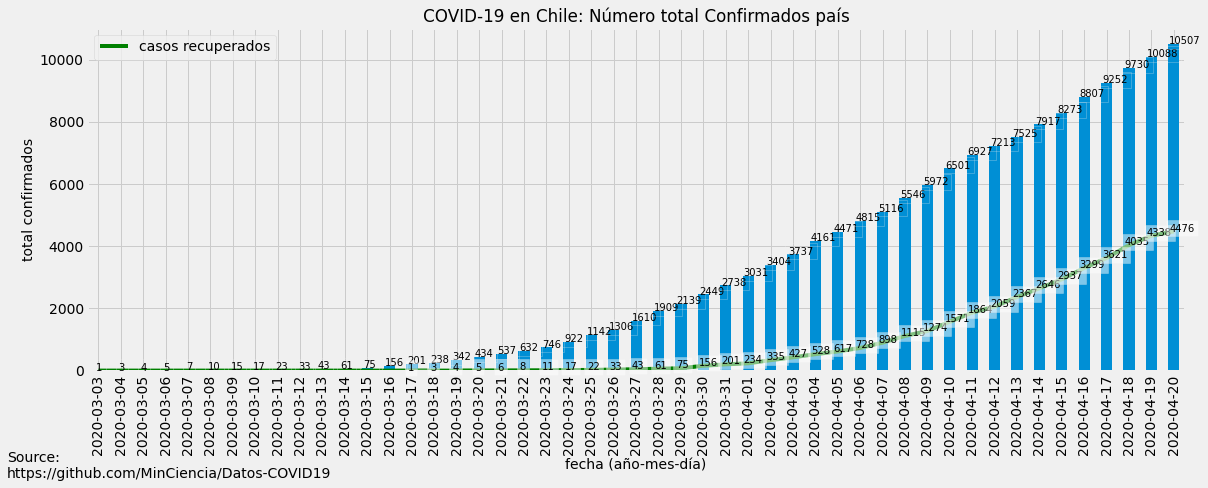

In [0]:
filename = today+'-COVID-19-Chile-TotalConfirmados-Activos-Rec-fallecidos.png'

fig, ax = plt.subplots(tight_layout=True,figsize=(17,7))

scale = 'linear'
fontsize = 10
dataCum.iloc[-1].plot(ax=ax, kind="bar")
my_tags(dataCum.iloc[-1],scale,fontsize,1.4,'none')

ax.plot(dataRec.iloc[-1],color='green')
my_tags(dataRec.iloc[-1],scale,fontsize,1.15,'white')

ax.set_yscale(scale)
plt.legend(fontsize='medium', labels=['casos recuperados'], loc = 'upper left')

ax.set_title(f'COVID-19 en Chile: Número total Confirmados país', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-80), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

In [0]:
# ejecutar esta celda solo si se quiere descargar el gráfico anterior

files.download(filename)

La OMS calcula los casos activos: 

Activos = Casos Acumulados - Casos Recuperados - Fallecidos



In [0]:
dataActivo = dataCum.iloc[-1] - dataRec.iloc[-1] - dataDeath.iloc[-1]

Con los casos activos y fallecidos complementamos la figura anterior

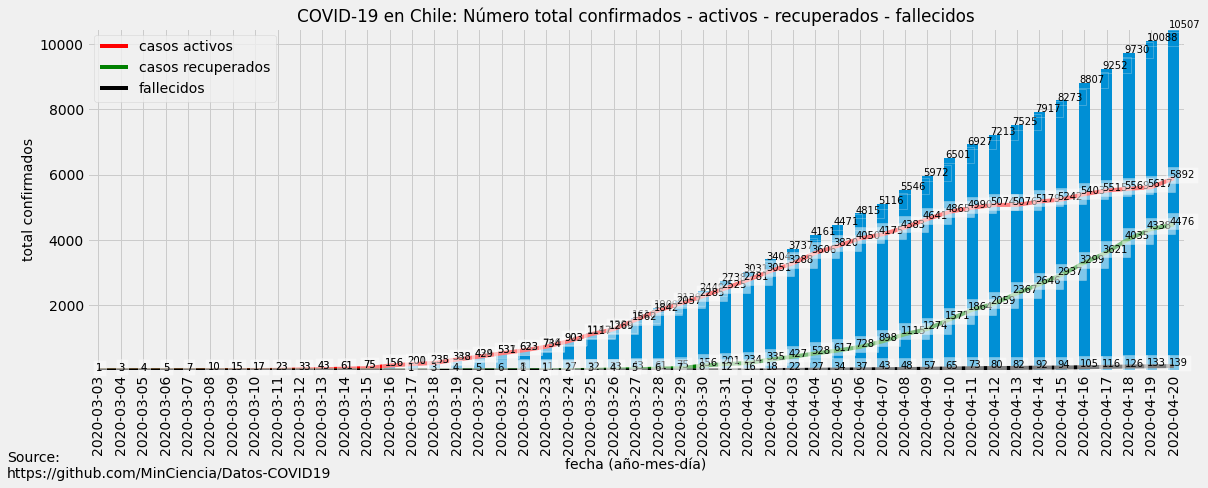

In [0]:
filename = today+'-COVID-19-Chile-TotalConfirmados-Activos-Rec-fallecidos.png'

fig, ax = plt.subplots(tight_layout=True,figsize=(17,7))

scale = 'linear'
fontsize = 10

dataCum.iloc[-1].plot(ax=ax, kind="bar")
my_tags(dataCum.iloc[-1],scale,fontsize,1.4,'none')

ax.plot(dataActivo,color='red')
my_tags(dataActivo,scale,fontsize,1.15,'white')

ax.plot(dataRec.iloc[-1],color='green')
my_tags(dataRec.iloc[-1],scale,fontsize,1.15,'white')

ax.plot(dataDeath.iloc[-1],color='black')
my_tags(dataDeath.iloc[-1],scale,fontsize,1.15,'white')

ax.set_ylim(0.9, dataCum.iloc[-1].max())
ax.set_yscale(scale)
plt.legend(fontsize='medium', labels=['casos activos','casos recuperados', 'fallecidos'], loc = 'upper left')

ax.set_title(f'COVID-19 en Chile: Número total confirmados - activos - recuperados - fallecidos', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-80), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

In [0]:
# ejecutar esta celda solo si se quiere descargar el gráfico anterior

files.download(filename)

La siguiente figura ayuda a visualizar la diferencia entre el número total de casos confirmados (acumulados) y los casos confirmados diariamente. 

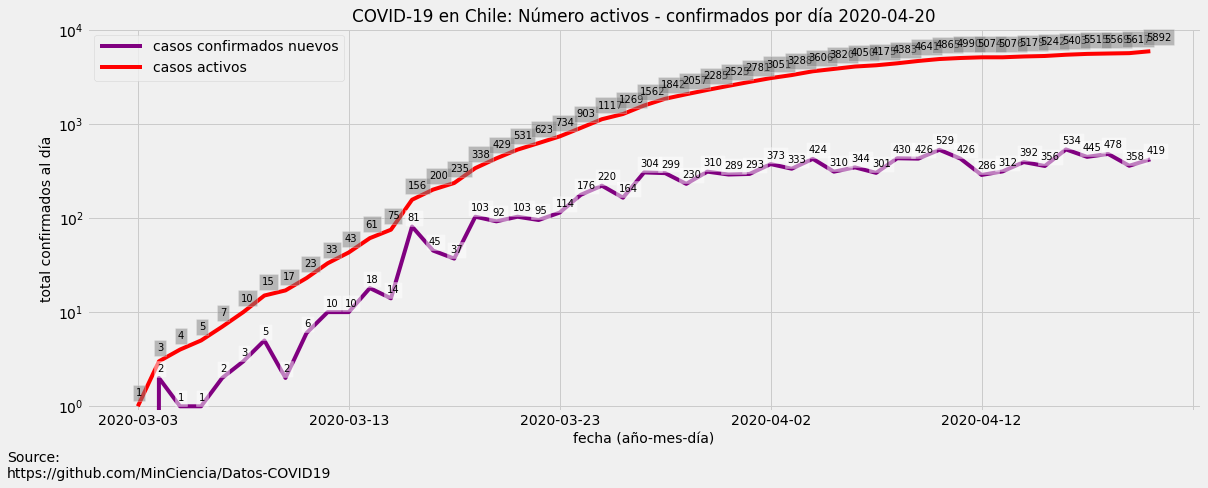

In [0]:
filename = today+'-COVID-19-Chile-Activos-ConfirmadosAlDia.png'

fig, ax = plt.subplots(tight_layout=True,figsize=(17,7))

scale = 'log'
fontsize = 10

dataNew.iloc[-1].plot(ax=ax, color='purple')
my_tags(dataNew.iloc[-1],scale,fontsize,1.15,'white')

ax.plot(dataActivo,color='red')
my_tags(dataActivo,scale,fontsize,1.3,'grey')

ax.set_ylim(0.9, dataCum.iloc[-1].max())
plt.legend(fontsize='medium', labels=['casos confirmados nuevos','casos activos'], handlelength=3.0, loc = 'upper left')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número activos - confirmados por día '+today, fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados al día', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-40), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

In [0]:
# ejecutar esta celda solo si se quiere descargar el gráfico anterior

files.download(filename)

# <h4>Graficar datos por región de varios días</h4>

En la sección anterior se leyeron los datos por país en los que está el desgloce por región. Ahora queremos ver el acumulado por cada región.

Preparamos las etiquetas a usar en la leyenda. Queremos visualizar las regiones y el total de casos acumulados a la fecha en la leyenda del gráfico

In [0]:
label_region = list()
temp = dataCum[date].values.tolist()
temp2 = dataTotalRegion.index.tolist()

for i in range(len(temp)):
  label_region.append(temp2[i]+' '+str(temp[i]))

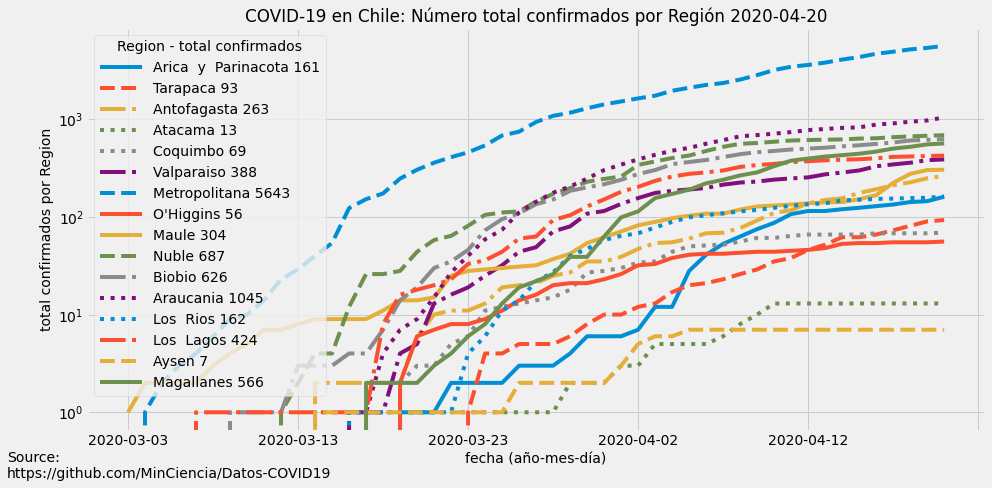

In [0]:
# Definimos el tipo de línea explícitamente ara evitar la duplicación de 
#  color/tipo de línea en las regiones

filename = today+'-COVID-19-Chile-TotalConfirmados-Region.png'

fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))
lsRegion = ['-','--','-.',':',':','-.','--','-','-','--','-.',':',':','-.','--','-']

for i in np.arange(len(dataCum.index)-1):
  dataCum.iloc[i].plot(ax=ax,ls=lsRegion[i])

plt.legend(fontsize='medium', labels=label_region, handlelength=3.0, title='Region - total confirmados')

ax.set_yscale('log')

ax.set_title(f'COVID-19 en Chile: Número total confirmados por Región '+today, fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados por Region', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-20), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

In [0]:
# ejecutar esta celda solo si se quiere descargar el gráfico anterior

files.download(filename)

Estas son figuras básicas para trabajar con los productos del repositorio. La idea es que generes tus propios gráficos modificando las columnas, estilos, colores, etc. En los próximos notebooks encontrarás ejemplos para utilizar los datos que se encuentran disponibles en [https://github.com/MinCiencia/Datos-COVID19/tree/master/output](https://github.com/MinCiencia/Datos-COVID19/tree/master/output)

Este notebook está inspirado en el [trabajo](https://github.com/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_Total_Fallecidos_por_Region.ipynb) publicado por Alonso Silva Allende.